In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DeepLearning 
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

# Image 
from PIL import Image
# Computer Vision 
import cv2

# Keras - CNN
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, ZeroPadding2D
# Avoid overfitting of deep learning network
from keras.layers import BatchNormalization  

In [2]:
#!unzip "/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari.zip" -d "/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/"

In [3]:
# Open Devalagari & display Image 
devanagari_img = Image.open('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/1/010_09.jpg')
devanagari_img1 = Image.open('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/2/010_09.jpg')
devanagari_img2 = Image.open('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/3/010_09.jpg')
devanagari_img3 = Image.open('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/4/010_09.jpg')
devanagari_img4 = Image.open('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/5/010_09.jpg')

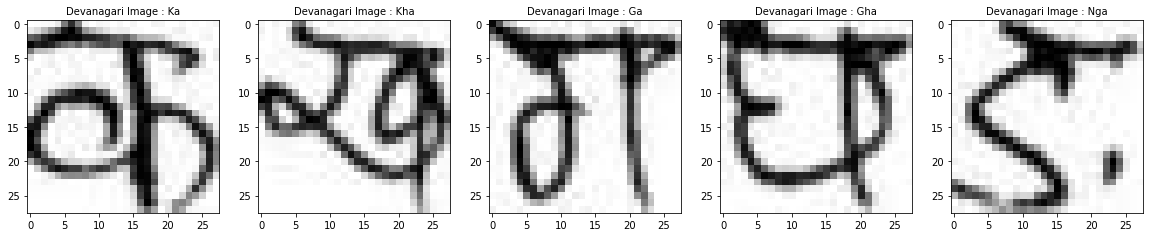

In [4]:
# plot using subplotting
fig = plt.figure(figsize = (20,6))

# row = 1, columns = 5
a1 = fig.add_subplot(1, 5, 1)
img_plot = plt.imshow( devanagari_img, cmap = "gray")
a1.set_title("Devanagari Image : Ka", fontsize = 10)

a2 = fig.add_subplot(1, 5, 2)
img_plot = plt.imshow( devanagari_img1, cmap = "gray")
a2.set_title("Devanagari Image : Kha", fontsize = 10)

a3 = fig.add_subplot(1, 5, 3)
img_plot = plt.imshow( devanagari_img2, cmap = "gray")
a3.set_title("Devanagari Image : Ga", fontsize = 10)

a4 = fig.add_subplot(1, 5, 4)
img_plot = plt.imshow( devanagari_img3, cmap = "gray")
a4.set_title("Devanagari Image : Gha", fontsize = 10)

a5 = fig.add_subplot(1, 5, 5)
img_plot = plt.imshow( devanagari_img4, cmap = "gray")
a5.set_title("Devanagari Image : Nga", fontsize = 10)

plt.show()

**Data Augmentation**

* All RGB Image data will used to form New Samples for Training
* New Samples will be transformed using Image Data Generator
* Images will be resampled using Normalization (Divide each pixels by 255) , Shear Range, Zoom Range, Brightness etc.

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator, img_to_array

from numpy import expand_dims

In [6]:
img = load_img('/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN/1/010_09.jpg')

In [7]:
data = img_to_array(img)
# axis = 0 : rowwise , axis = 1 : columnwise
samples = expand_dims(data, axis = 0)

In [8]:
# 3 = Its a RGB,  
samples.shape

(1, 28, 28, 3)

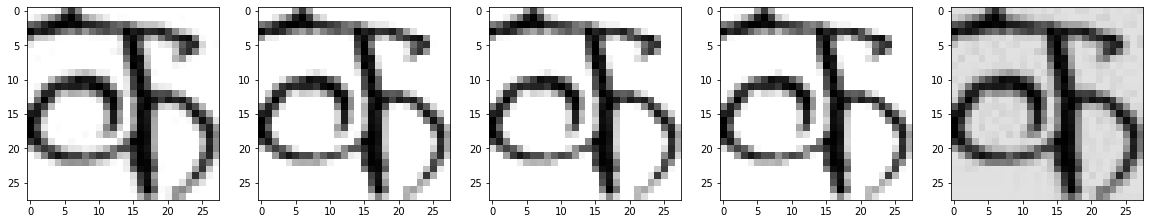

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# Brigtness of Image Data 
datagen = ImageDataGenerator(brightness_range=[0.8, 1.5])

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize= (20, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)

plt.show()

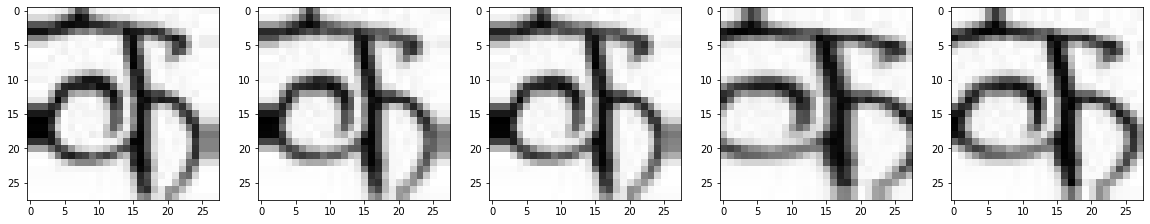

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
# Zoom of Image Data 
datagen = ImageDataGenerator(zoom_range= 0.2)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize= (20, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

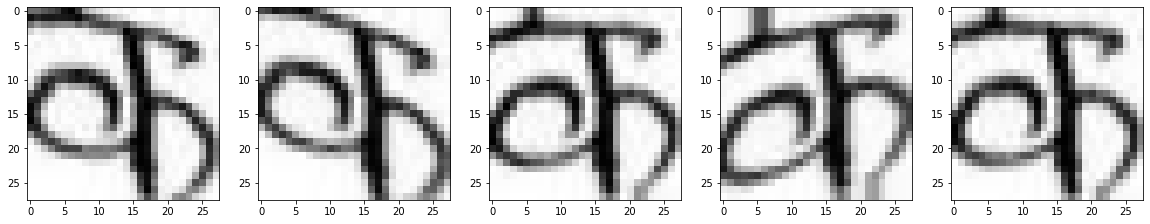

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# Shear Range of Image Data 
datagen = ImageDataGenerator(shear_range= 20)

IDG = datagen.flow(samples, batch_size = 1)

fig, ax = plt.subplots(1, 5, figsize= (20, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

In [12]:
# Transformation of training samples using data augmentation
train_datagen = ImageDataGenerator(rescale= 1./255, brightness_range= [0.8, 1.5], 
                                  rotation_range = 20, 
                                  zoom_range = 0.1,
                                  shear_range = 20)
# Dont transform test image data 
test_datagen = ImageDataGenerator(rescale = 1./ 255)

In [13]:
train_folder = "/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TRAIN"
test_folder = "/content/drive/MyDrive/DL - NLP - 17-02/Devanagari/Devanagari/TEST"

In [14]:
# Reshaping image pixels with target size = 64 x 64
training_set = train_datagen.flow_from_directory(train_folder, target_size=(64, 64), batch_size= 64, 
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_folder, target_size=(64, 64), batch_size= 64, 
                                                 class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


**CNN Model**

In [15]:
def build_model():
    model = Sequential()
    # Conv2D - I
    model.add(ZeroPadding2D(padding=(1,1), input_shape = training_set.image_shape))
    model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv2D - II
    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv2D - III
    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(filters = 256, kernel_size=(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv2D - IV
    model.add(ZeroPadding2D(padding=(1,1)))
    model.add(Conv2D(filters = 512, kernel_size=(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Flatten Matrix
    model.add(Flatten())

    # Fully Connected Layer (F.C)
    model.add(Dense(units= 512, activation='relu'))
    #Output layer - MultiClass Classification
    model.add(Dense(units= 48, activation='softmax'))

    # learning rate 
    # optimizers for classification
    optimizers = Adam(learning_rate=0.0001)

    model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [16]:
model = build_model() 

In [17]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [18]:
from keras import callbacks

filepath = "/content/Best_Model.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)
callbacks_list = [checkpoint]

In [19]:
batch_size = 64 

In [20]:
history = model.fit_generator(generator= training_set, validation_data= test_set, epochs = 30,
                              shuffle = True, steps_per_epoch = int(6528/ batch_size), 
                              validation_steps = int(3312/ batch_size), 
                              callbacks= callbacks_list, 
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
102/102 [==============================] - 5526s 54s/step - loss: 3.4253 - accuracy: 0.1932 - val_loss: 4.5466 - val_accuracy: 0.0230

Epoch 00001: val_loss improved from inf to 4.54663, saving model to /content/Best_Model.hdf5
Epoch 2/30
102/102 [==============================] - 30s 291ms/step - loss: 1.3712 - accuracy: 0.6197 - val_loss: 4.9399 - val_accuracy: 0.0331

Epoch 00002: val_loss did not improve from 4.54663
Epoch 3/30
102/102 [==============================] - 30s 290ms/step - loss: 0.9177 - accuracy: 0.7314 - val_loss: 4.5079 - val_accuracy: 0.0812

Epoch 00003: val_loss improved from 4.54663 to 4.50788, saving model to /content/Best_Model.hdf5
Epoch 4/30
102/102 [==============================] - 30s 298ms/step - loss: 0.6750 - accuracy: 0.7953 - val_loss: 2.2870 - val_accuracy: 0.3998

Epoch 00004: val_loss improved from 4.50788 to 2.28705, saving model to /content/Best_Model.hdf5
Epoch 5/30
102/102 [==============================] - 29s 288ms/step - loss: 0

In [21]:
model.load_weights('/content/Best_Model.hdf5')

In [22]:
model.evaluate_generator(test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.3676639795303345, 0.8997584581375122]

In [23]:
import cv2

In [24]:
# opencv reads image file - opencv reads image data in BGR Format
img_new = cv2.imread("/content/devanagiri.png")

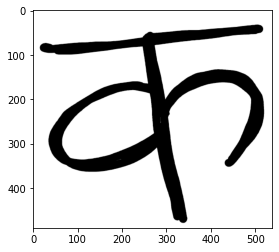

In [25]:
plt.imshow(img_new)

In [26]:
img_new.shape

(490, 538, 3)

In [28]:
# training input shape = 6x64
img_new = cv2.resize(img_new, (64,64))

In [29]:
b, g, r = cv2.split(img_new)

In [30]:
img_new = cv2.merge([r, g, b])

In [32]:
X_new = np.squeeze(img_new)

In [34]:
X_new = X_new.astype('float32')
X_new /= 255

In [35]:
X_new

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [37]:
# 1 - number of images
X_new = X_new.reshape(1, 64, 64, 3)

In [39]:
np.argmax(model.predict(X_new))

0

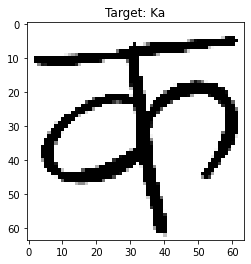

In [41]:
dict_label = {0 : 'Ka', 11: 'Kha'}
predicted_new = np.argmax(model.predict(X_new))
plt.imshow(img_new)
plt.title("Target: %s" %dict_label[predicted_new])
plt.show()